### 사고 발생은 특정 시간대에 집중된다.

귀무가설(H0): 사고 발생은 특정 시간대와 관련이 없다.
<br>
<br>
대립가설(H1): 사고 발생은 특정 시간대와 관련이 있다.

In [100]:
# 라이브러리 호출 및 plot 설정
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML
from scipy.stats import chi2_contingency
import warnings

plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False
warnings.filterwarnings("ignore")

In [ ]:
# 시간 데이터
df_time = pd.read_excel('../../data/preprocessed_data/시도_시군구_시간대별_노인교통사고_전처리ver.xlsx', header=[0, 1])
# df_time
HTML(df_time.head(5).to_html())

In [102]:
# 시간대 컬럼 및 연도 추출
time_columns = [col for col in df_time.columns if col[1] not in ['합계'] and col[0] not in ['합계']]
time_years = sorted(set([col[0] for col in time_columns]))
time_labels = sorted(set([col[1] for col in time_columns]))

# 연도별 시간대 합계 계산
year_time_sums = {}
for year in time_years:
    cols_for_year = [col for col in time_columns if col[0] == year]
    year_time_sums[year] = df_time[cols_for_year].sum().values

time_labels = [col[1] for col in time_columns if col[0] == time_years[0]]       # 시간대 라벨
valid_years = [year for year in year_time_sums if year.isdigit()]               # '기준년도', '시군구', '시도'와 같은 연도 외 키 제거

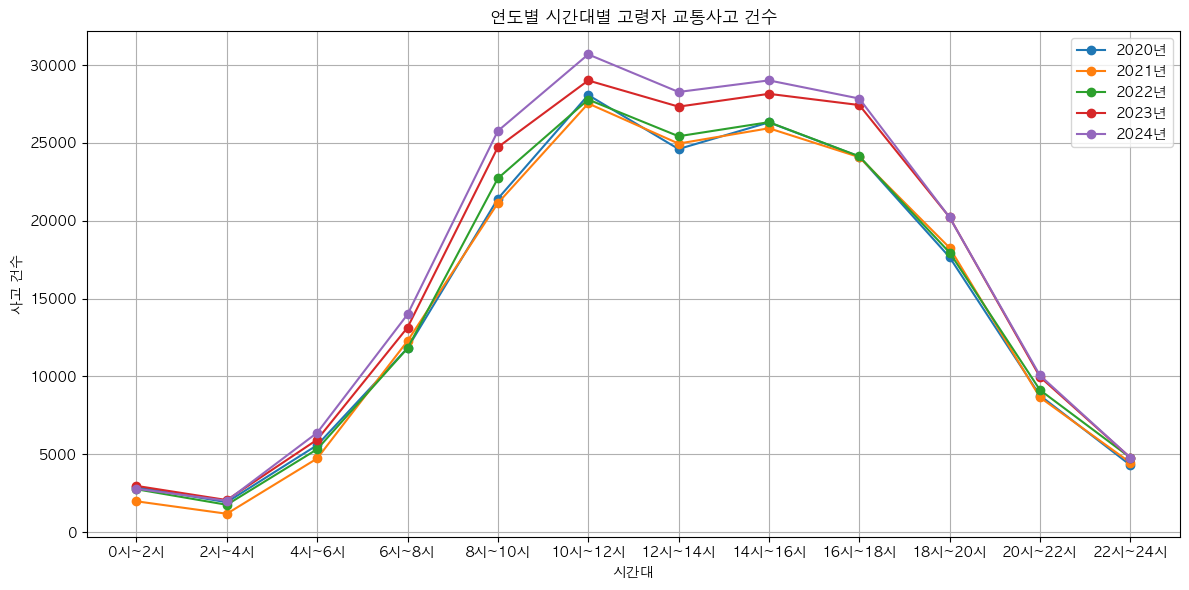

In [103]:
# 1. 라인 플롯: 연도별 시간대별 사고 변화 추이
plt.figure(figsize=(12, 6))
for year in valid_years:
    plt.plot(time_labels, year_time_sums[year], marker='o', label=f"{year}년")

plt.title("연도별 시간대별 고령자 교통사고 건수")
plt.xlabel("시간대")
plt.ylabel("사고 건수")
plt.xticks()
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# save_path = '../../outputs/가설_3/연도별_시간대별_고령자_교통사고.png'
# plt.savefig(save_path)

In [104]:
# 시간대 컬럼 및 연도 추출
time_columns = [col for col in df_time.columns if col[1] not in ['합계'] and col[0] not in ['합계']]
time_years = sorted(set([col[0] for col in time_columns if col[0].isdigit()]))
time_labels = sorted(set([col[1] for col in time_columns]))

heatmap_data = pd.DataFrame(index=time_labels, columns=time_years)              # 연도별 시간대별 합계 테이블 생성

for year in time_years:
    cols_for_year = [col for col in time_columns if col[0] == year]
    sums = df_time[cols_for_year].sum()
    for col in cols_for_year:
        heatmap_data.loc[col[1], year] = sums[col]

heatmap_data = heatmap_data.fillna(0).astype(int)                                      # 결측치 제거 및 숫자형 변환
heatmap_data = heatmap_data.drop(index=["기준년도", "시군구", "시도"], errors="ignore")     # 기준년도, 시군구, 시도와 관련된 행 제거


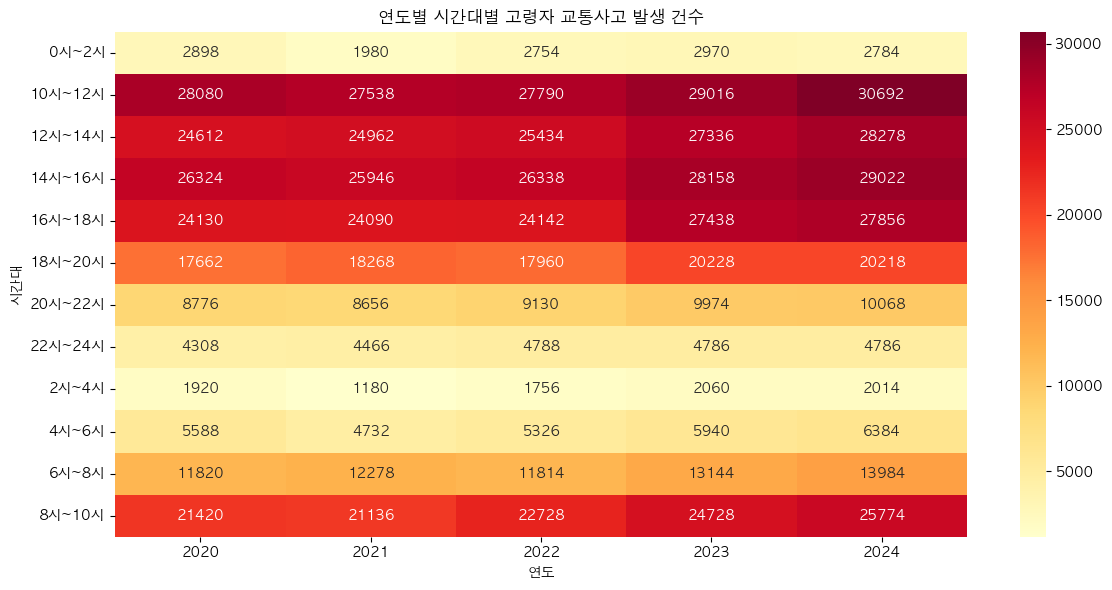

In [105]:
# 2. 히트맵 시각화
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlOrRd")
plt.title("연도별 시간대별 고령자 교통사고 발생 건수")
plt.xlabel("연도")
plt.ylabel("시간대")
plt.tight_layout()
plt.show()

# save_path = '../../outputs/가설_3/연도별_시간대별_고령자_교통사고_heatmap.png'
# plt.savefig(save_path)

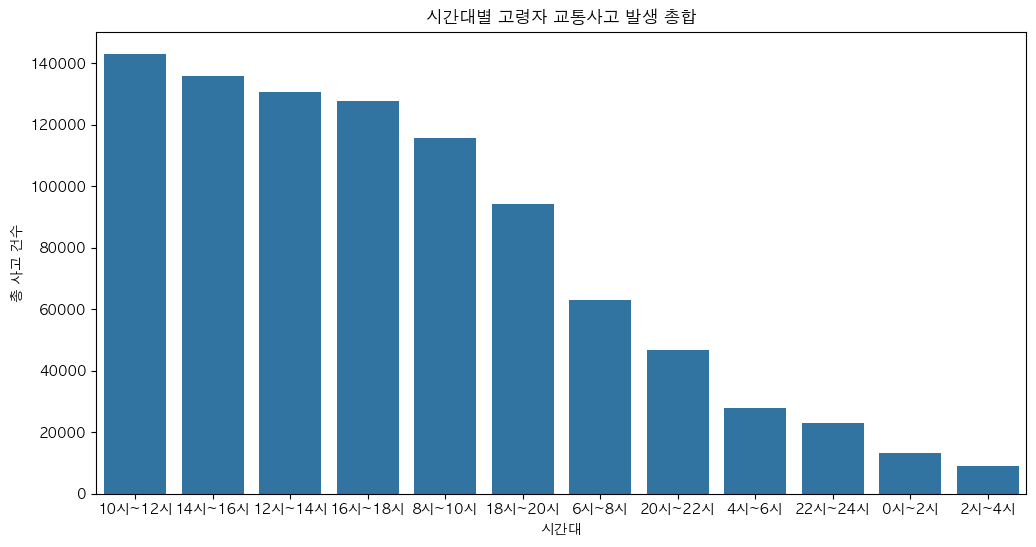

In [106]:
# 3. 시간대별 총합 바플롯
time_totals = heatmap_data.sum(axis=1).sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=time_totals.index, y=time_totals.values)
plt.title("시간대별 고령자 교통사고 발생 총합")
plt.xlabel("시간대")
plt.ylabel("총 사고 건수")
plt.xticks()
plt.show()

# save_path = '../../outputs/가설_3/시간대별_고령자_교통사고_총합.png'
# plt.savefig(save_path)

In [108]:
year_time_sums = {}
for year in time_years:
    cols_for_year = [col for col in time_columns if col[0] == year]
    year_time_sums[year] = df_time[cols_for_year].sum().values

time_labels = [col[1] for col in time_columns if col[0] == time_years[0]]       # 시간대 라벨
valid_years = [year for year in year_time_sums if year.isdigit()]               # '기준년도', '시군구', '시도'와 같은 연도 외 키 제거

# 시간대별, 연도별 사고 건수 테이블 만들기
contingency_df = pd.DataFrame({
    year: year_time_sums[year] for year in valid_years
}, index=time_labels)

print(contingency_df)

          2020   2021   2022   2023   2024
0시~2시     2898   1980   2754   2970   2784
2시~4시     1920   1180   1756   2060   2014
4시~6시     5588   4732   5326   5940   6384
6시~8시    11820  12278  11814  13144  13984
8시~10시   21420  21136  22728  24728  25774
10시~12시  28080  27538  27790  29016  30692
12시~14시  24612  24962  25434  27336  28278
14시~16시  26324  25946  26338  28158  29022
16시~18시  24130  24090  24142  27438  27856
18시~20시  17662  18268  17960  20228  20218
20시~22시   8776   8656   9130   9974  10068
22시~24시   4308   4466   4788   4786   4786


In [109]:
chi2, p, dof, expected = chi2_contingency(contingency_df.T)

print(f"\n카이제곱 통계량: {chi2:.4f}")
print(f"p-value: {p:.10f}")
print(f"자유도: {dof}")

# =======================================
# p-value는 0.0000이므로, 회귀계수가 유의미
# 귀무가설 기각
# 자유도 = 11 X 4 > 시간대는 12개, 연도는 5개
# =======================================


카이제곱 통계량: 799.8412
p-value: 0.0000000000
자유도: 44
